In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import Datasets

In [2]:
df = pd.read_excel("dataset/Daily Update Data Agregat Covid-19 Jakarta.xlsx", date_parser="Tanggal")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.drop(columns=["belum_diketahui_(masih_verifikasi)", "menunggu_hasil", "tenaga_kesehatan_terinfeksi"], axis="columns", inplace=True)
df["jam"] = df["jam"].fillna(df["jam"].mode()[0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tanggal          499 non-null    datetime64[ns]
 1   jam              499 non-null    float64       
 2   tanggal_jam      499 non-null    datetime64[ns]
 3   total_pasien     499 non-null    int64         
 4   sembuh           499 non-null    int64         
 5   meninggal        499 non-null    int64         
 6   self_isolation   499 non-null    int64         
 7   masih_perawatan  499 non-null    int64         
 8   positif_harian   499 non-null    int64         
 9   positif_aktif    499 non-null    int64         
 10  sembuh_harian    499 non-null    int64         
 11  tanpa_gejala     359 non-null    float64       
 12  bergejala        359 non-null    float64       
 13  belum_ada_data   359 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(8)

In [4]:
df.isna().sum()

tanggal              0
jam                  0
tanggal_jam          0
total_pasien         0
sembuh               0
meninggal            0
self_isolation       0
masih_perawatan      0
positif_harian       0
positif_aktif        0
sembuh_harian        0
tanpa_gejala       140
bergejala          140
belum_ada_data     140
dtype: int64

In [5]:
df

,tanggal,jam,tanggal_jam,total_pasien,sembuh,meninggal,self_isolation,masih_perawatan,positif_harian,positif_aktif,sembuh_harian,tanpa_gejala,bergejala,belum_ada_data
0,2020-03-01,8.0,2020-03-01 18:00:00,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-02,8.0,2020-03-02 18:00:00,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-03,8.0,2020-03-03 18:00:00,3,0,1,0,2,3,2,0,NaN,NaN,NaN
3,2020-03-04,8.0,2020-03-04 18:00:00,3,0,1,0,2,0,2,0,NaN,NaN,NaN
4,2020-03-05,8.0,2020-03-05 18:00:00,7,0,3,0,4,4,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2021-07-08,8.0,2021-07-08 08:00:00,623277,512085,9110,72361,29721,12974,102082,10886,14748.0,50824.0,36510.0
495,2021-07-09,8.0,2021-07-09 08:00:00,636389,526941,9306,73239,26903,13112,100142,14856,10095.0,40727.0,49320.0
496,2021-07-10,8.0,2021-07-10 08:00:00,649309,543867,9357,71812,24273,12920,96085,16926,7999.0,26379.0,61707.0
497,2021-07-11,8.0,2021-07-11 08:00:00,662442,564437,9395,68251,20359,13133,88610,20570,4769.0,12893.0,70948.0


1. Dari dataset yang disediakan, temukan nilai mean, median, dan modus dari positif COVID19 harian Jakarta.

In [6]:
df.agg({"positif_harian":["max", np.median, "min", "mean"]})

,positif_harian
max,14619.000000
median,884.000000
min,0.000000
mean,1356.835671


In [7]:
df["positif_harian"].mode()[0]

0

2. Dari dataset yang disediakan, temukan nilai minimal dan maksimal dari positif COVID19 harian Jakarta.

In [8]:
df.agg({"positif_harian":["max", "min"]})

,positif_harian
max,14619
min,0


3. Dari dataset yang disediakan, temukan nilai-nilai outlier yang ada (menggunakan variabel yang kalian tentukan).

In [9]:
df.columns

Index(['tanggal', 'jam', 'tanggal_jam', 'total_pasien', 'sembuh', 'meninggal',
       'self_isolation', 'masih_perawatan', 'positif_harian', 'positif_aktif',
       'sembuh_harian', 'tanpa_gejala', 'bergejala', 'belum_ada_data'],
      dtype='object')

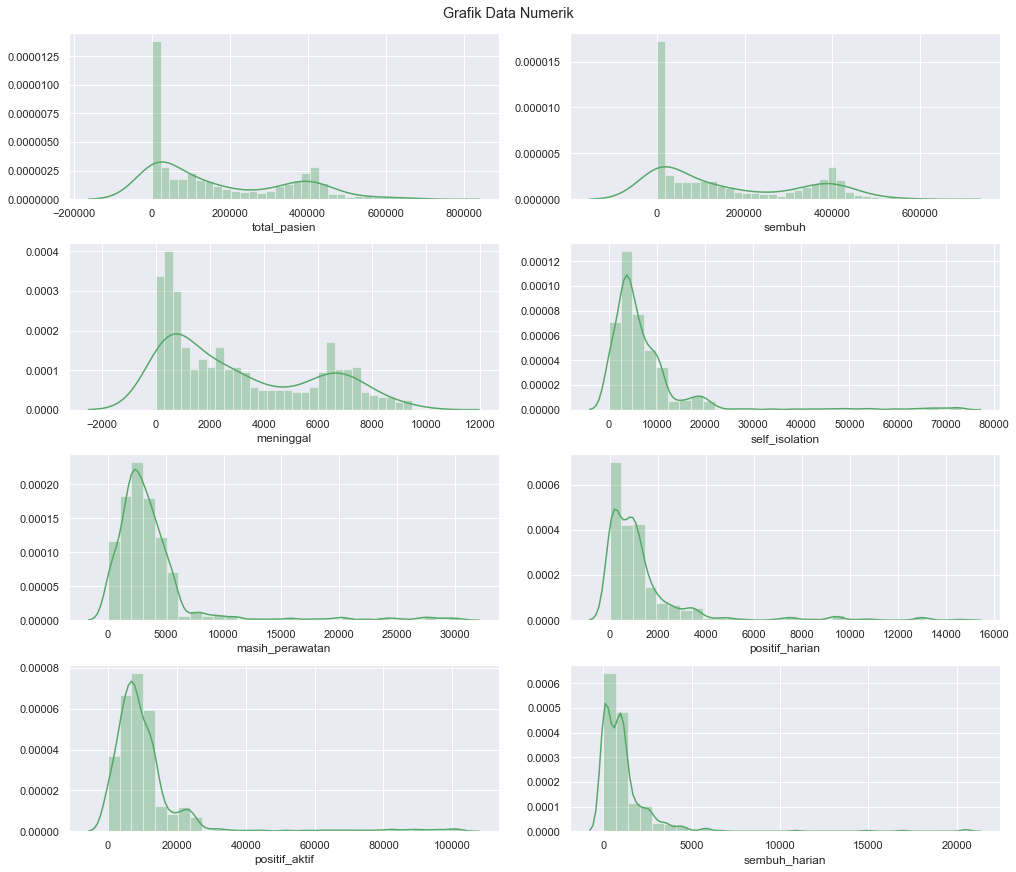

In [10]:
columns = ["total_pasien", "sembuh", "meninggal", "self_isolation", "masih_perawatan", "positif_harian", "positif_aktif", "sembuh_harian"]
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(14, 12),constrained_layout=True)
fig.suptitle("Grafik Data Numerik")
for kolom, ax in zip(columns, axes.flatten()):
    sns.distplot(df[kolom], ax=ax, bins=30, color="g")
plt.show()

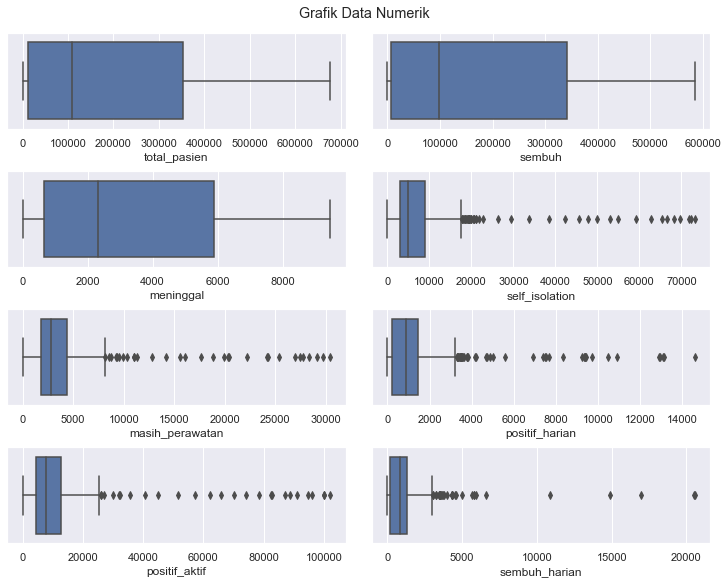

In [11]:
columns = ["total_pasien", "sembuh", "meninggal", "self_isolation", "masih_perawatan", "positif_harian", "positif_aktif", "sembuh_harian"]
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(10, 8),constrained_layout=True)
fig.suptitle("Grafik Data Numerik")
for kolom, ax in zip(columns, axes.flatten()):
    sns.boxplot(df[kolom], ax=ax)
plt.show()

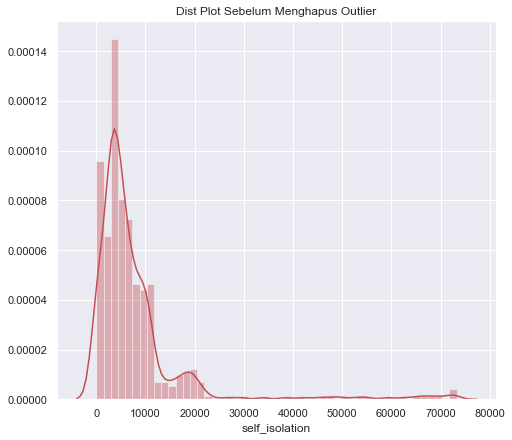

In [12]:
fig, ax = plt.subplots(figsize=(7, 6), constrained_layout=True)
_ = ax.set_title("Dist Plot Sebelum Menghapus Outlier")
_ = sns.distplot(df["self_isolation"], ax=ax, color="r")

plt.show()

In [13]:
q1 = df["self_isolation"].quantile(0.25)
q3 = df["self_isolation"].quantile(0.75)
IQR = q3 - q1
batas_bawah = q1 - (1.5 * IQR)
batas_atas = q3 + (1.5 * IQR)
print(f"nilai Q1 = {q1}\nnilai Q3 = {q3}\nnilai IQR = {IQR}\nBatas Bawah = {batas_bawah}\nBatas Atas = {batas_atas}")

nilai Q1 = 2997.5
nilai Q3 = 8868.0
nilai IQR = 5870.5
Batas Bawah = -5808.25
Batas Atas = 17673.75


In [14]:
df[(df["self_isolation"]>=batas_bawah) & (df["self_isolation"]<=batas_atas)]["self_isolation"].agg(["max", "min"])

max    17524
min        0
Name: self_isolation, dtype: int64

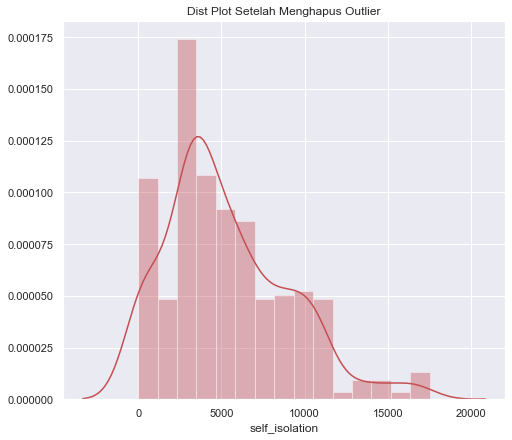

In [15]:
fig, ax = plt.subplots(figsize=(7, 6), constrained_layout=True)
_ = ax.set_title("Dist Plot Setelah Menghapus Outlier")
_ = sns.distplot(df[(df["self_isolation"]>=batas_bawah) & (df["self_isolation"]<=batas_atas)]["self_isolation"], ax=ax, color="r")

plt.show()

In [16]:
df = df[(df["self_isolation"]>=batas_bawah) & (df["self_isolation"]<=batas_atas)]

4. Dari dataset yang disediakan, usulkan dua buah variabel dan berikan analisis korelasi antara kedua variabel tersebut. Jelaskan apa kesimpulan
yang dapat diambil berdasarkan analisis kalian.

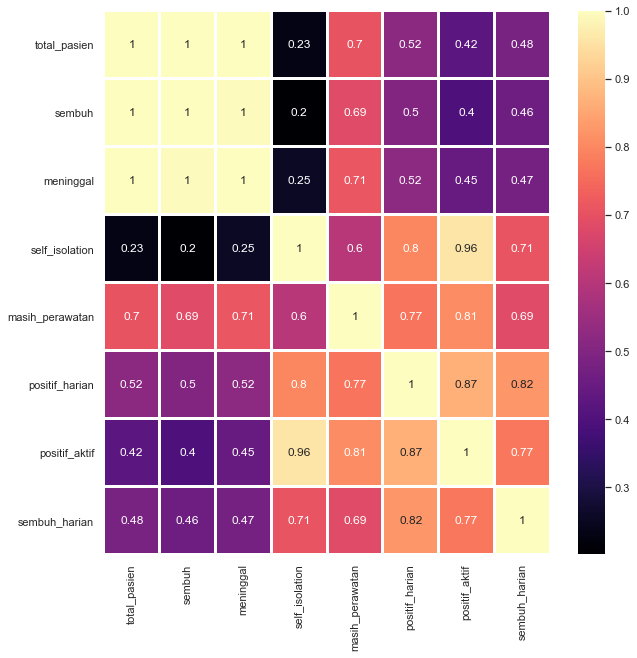

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = sns.heatmap(df.loc[:,"total_pasien":"sembuh_harian"].corr(), annot=True, cmap="magma", linewidths=2, ax=ax)

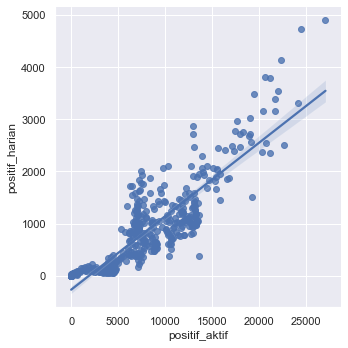

In [18]:
sns.lmplot(x="positif_aktif", y="positif_harian", data=df)

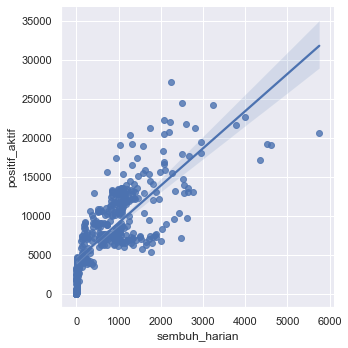

In [20]:
sns.lmplot(x="sembuh_harian", y="positif_aktif", data=df)

In [21]:
df.columns

Index(['tanggal', 'jam', 'tanggal_jam', 'total_pasien', 'sembuh', 'meninggal',
       'self_isolation', 'masih_perawatan', 'positif_harian', 'positif_aktif',
       'sembuh_harian', 'tanpa_gejala', 'bergejala', 'belum_ada_data'],
      dtype='object')

In [ ]:
columns = ["self_isolation", "masih_perawatan", "positif_aktif", "sembuh_harian"]
fig, ax = plt.subplots()